In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt

In [2]:
#create file and read in csv 
file_path = "mxmh_survey_results.csv"
mental_health_data_df = pd.read_csv(file_path)
mental_health_data_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
mental_health_data_df['Primary streaming service'].fillna(value='N/A', inplace=True)
mental_health_data_df['BPM'].fillna(value='-1', inplace=True)
mental_health_data_df['Music effects'].fillna(value='N/A', inplace=True)
mental_health_data_df['While working'].fillna(value='N/A', inplace=True)
del mental_health_data_df['Instrumentalist']
del mental_health_data_df['Foreign languages']
del mental_health_data_df['Composer']
del mental_health_data_df['Permissions']

In [4]:
mental_health_data_df = mental_health_data_df.dropna(how='any')
mental_health_data_df.head()
mental_health_data_df_40_under = mental_health_data_df[mental_health_data_df['Age'] < 41].copy()

In [5]:
age_bins = [10, 20, 30, 40]
age_labels = ['10 to 20', '21 to 30', '31 to 40']
mental_health_data_df_40_under['Age group'] = pd.cut(mental_health_data_df_40_under['Age'], age_bins, labels=age_labels)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age group
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,10 to 20
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,10 to 20
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,10 to 20
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,10 to 20
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,10 to 20


In [6]:
mental_health_data_df_40_under.set_index('Age group', inplace=True)
mental_health_data_df_40_under.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Fav genre,Exploratory,BPM,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
Age group,,,,,,,,,,,,,,,,,,,,,
10 to 20,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Latin,Yes,156,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A
10 to 20,8/27/2022 21:28:18,18.0,Spotify,4.0,No,Video game music,No,132,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
10 to 20,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,R&B,Yes,107,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
10 to 20,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Jazz,Yes,86,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
10 to 20,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Video game music,Yes,66,Sometimes,Never,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [7]:
generation_groups = mental_health_data_df_40_under.groupby('Age group')
mean_by_generation = generation_groups.mean()
del mean_by_generation['Age']
del mean_by_generation['Hours per day']
mean_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
10 to 20,5.868343,4.520710,3.640533,2.689349
21 to 30,6.271255,5.574899,3.724696,2.894737
31 to 40,5.723684,5.000000,4.328947,2.605263


In [8]:
median_by_generation = generation_groups.median()
del median_by_generation['Age']
del median_by_generation['Hours per day']
median_by_generation

,Anxiety,Depression,Insomnia,OCD
Age group,,,,
10 to 20,6.5,5.0,3.0,2.0
21 to 30,7.0,6.0,3.0,2.0
31 to 40,6.0,6.0,4.0,1.0


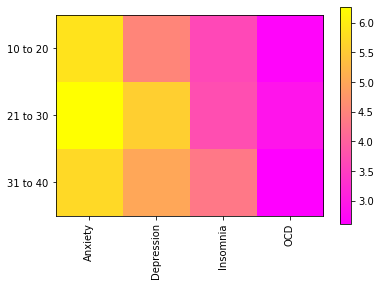

In [9]:
mental_illness_labels = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, ax = plt.subplots()
#create heat map
mean_im = ax.imshow(mean_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(mean_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)

# display plot
plt.show()

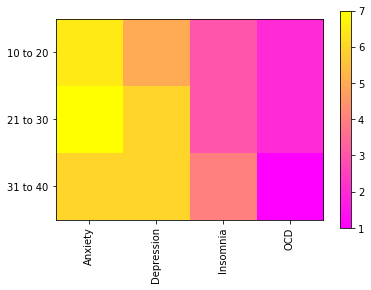

In [10]:
fig, ax = plt.subplots()
#create heat map
median_im = ax.imshow(median_by_generation, cmap = 'spring')
#add colourbar
cbar = ax.figure.colorbar(median_im, ax=ax)

# add labels
ax.set_xticks(np.arange(len(mental_illness_labels)))
ax.set_xticklabels(mental_illness_labels, rotation=90)
ax.set_yticks(np.arange(len(age_labels)))
ax.set_yticklabels(age_labels)
# display plot
plt.show()

From this data there are a few things I would want to observe after looking at this data. As age increases we see an inverse relationship with self-reported mental illness severity. My gut instinct is to say this data DOES NOT imply older people expierence less mental health problems. Rather, this data leads me to want to re-evaluate the population in some way to determine whether or older people are less aware of their mental health or less willing to admit to themselves they may suffer from some sort of mental illness. We could infer possible social destigmaisation of mental health problems in younger geneations. 